In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords

from wordcloud import WordCloud

In [68]:
# !pip install wordcloud

In [4]:
filename = 'heart.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

### Нормалізація даних

ignore = ['HeartDisease', 'Sex', 'ExerciseAngina', 'RestingECG', 'ChestPainType', 'ST_Slope']

# Копіюємо вихідний датасет
normalized_df = df.copy()

# Вибираємо ознаки, які потрібно нормалізувати (усі, окрім ігнорованих ознак)
features_to_normalize = [col for col in normalized_df.columns if col not in ignore]

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Нормалізуємо вибрані ознаки в окремому датасеті
normalized_df[features_to_normalize] = scaler.fit_transform(normalized_df[features_to_normalize])

# Виводимо нормалізований датасет
# normalized_df

# Відокремлюємо цільову змінну
y = normalized_df['HeartDisease']

# Видаляємо цільову змінну з основного DataFrame
X = normalized_df.drop('HeartDisease', axis=1)

In [17]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2


D:\Programs\Miniconda3\envs\dl_env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Programs\Miniconda3\envs\dl_env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


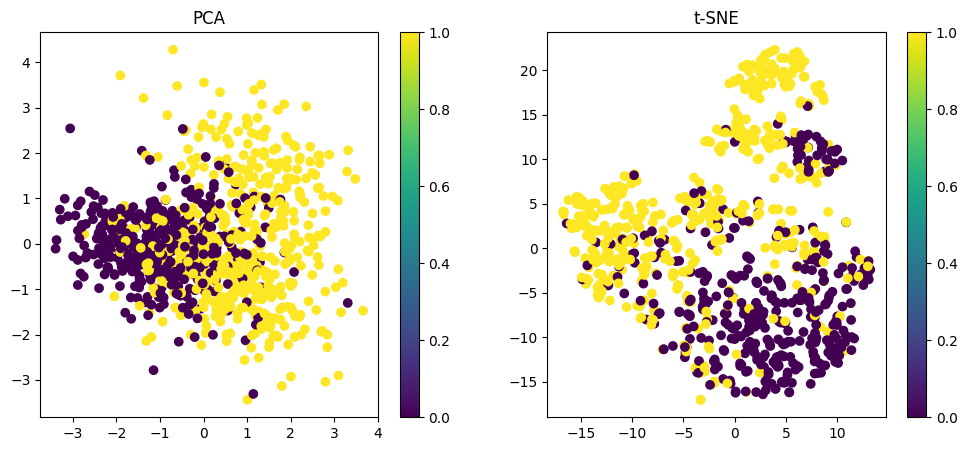

In [22]:
# Використовуємо PCA для зниження розмірності до двох компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Використовуємо t-SNE для зниження розмірності до двох компонент
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Візуалізуємо результати

# Використовуючи PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.colorbar()

# Використовуючи t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
plt.colorbar()

plt.show()

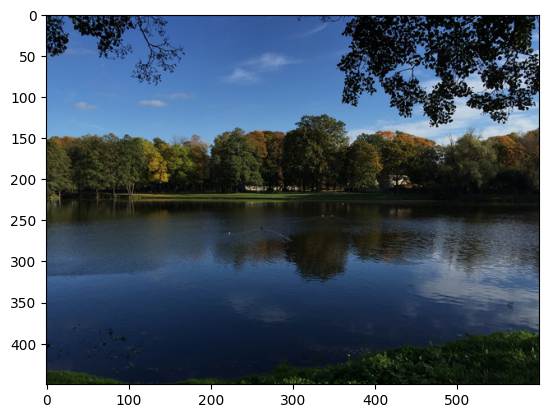

In [30]:
# оригінальне зображення
image = cv2.imread('sample_image_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

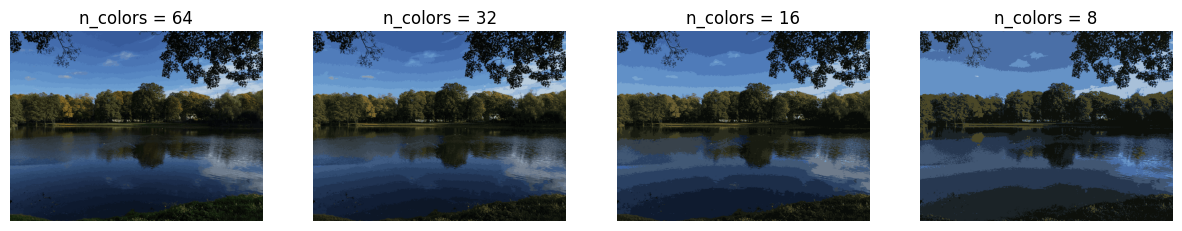

In [29]:
# Load the image
image = cv2.imread('sample_image_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.uint8)

# Convert the image to a one-dimensional array of pixels
pixels = image.reshape(-1, 3)

# List of n_colors to try
n_colors_list = [64, 32, 16, 8]

# Create subplots for each n_colors
fig, axes = plt.subplots(1, len(n_colors_list), figsize=(15, 5))

for i, n_colors in enumerate(n_colors_list):
    # Apply k-means for color quantization
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(pixels)
    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    # Transform pixels into the colors of cluster centers
    quantized_image = centers[labels].reshape(image.shape).astype(np.uint8)

    # Display the quantized image
    ax = axes[i]
    ax.imshow(quantized_image)
    ax.set_title(f'n_colors = {n_colors}')
    ax.axis('off')

plt.show()

In [64]:
'''
3. Обробка та класифікація текстових даних 
Завантажте набір текстових даних (з мітками класів). 
Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), 
за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. 
Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). 
Проведіть класифікацію текстових даних, зробіть оцінку якості.  
'''

text_filename = 'spam.csv'

encodings = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings:
    try:
        text_dataset = pd.read_csv(text_filename, encoding=encoding)[['v1','v2']]
        break  # Stop trying encodings if successful
    except UnicodeDecodeError:
        continue

text_dataset['v2'] = text_dataset['v2'].map(lambda x: x.lower())


# 1. Tokenization
text_dataset['v2'] = text_dataset['v2'].apply(lambda x: x.split())

# 2. Removal of Punctuation
text_dataset['v2'] = text_dataset['v2'].apply(
    lambda tokens: [word.strip(string.punctuation) for word in tokens]
)

# 3. Stop Word Removal
stop_words = set(stopwords.words('english'))
text_dataset['v2'] = text_dataset['v2'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

text_dataset['v1'] = text_dataset['v1'].map({'ham': 0, 'spam': 1})

text_dataset.head()

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"


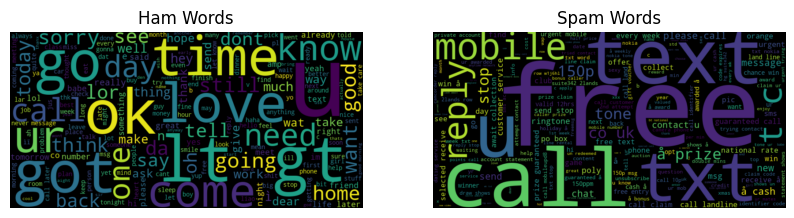

In [71]:
ham_words = ' '.join(text_dataset[text_dataset['v1'] == 0]['v2'].apply(' '.join))
spam_words = ' '.join(text_dataset[text_dataset['v1'] == 1]['v2'].apply(' '.join))

# Create Word Clouds
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

# Plot Word Clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.show()

In [88]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(text_dataset['v2'].apply(' '.join))
y = text_dataset['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.95      0.63      0.76       150

    accuracy                           0.95      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115

[[960   5]
 [ 56  94]]


<5572x8624 sparse matrix of type '<class 'numpy.float64'>'
	with 48344 stored elements in Compressed Sparse Row format>